<a href="https://colab.research.google.com/github/KimJisanER/code_jjambbong/blob/main/molecular_inputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

import sys
sys.path

import condacolab
condacolab.check()

!mamba install -c conda-forge rdkit

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64 

In [20]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [21]:
def load_sdf_file(file_path):
    suppl = Chem.SDMolSupplier(file_path)
    mols = [x for x in suppl if x is not None]
    df = PandasTools.LoadSDF(file_path)
    df['Molecule'] = mols
    # df = df[['chembl_id', 'Molecule']]
    df = df.dropna()
    return df

def preprocess_data(df):
    # Molecular fingerprint 계산
    fp_list = []
    for mol in df['Molecule']:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
        fp_list.append(keras.utils.to_categorical(fp, num_classes=2))
    df['Fingerprint'] = fp_list

    # Fingerprint를 numpy 배열로 변환
    X = np.array(list(df['Fingerprint']))
    X = np.reshape(X, (X.shape[0], -1))

    return X


In [22]:
sdf_file_path = '/content/drive/MyDrive/5_HTR/all_aminergic_ligands_modified.sdf'

In [ ]:
# SDF 파일 로드
df = load_sdf_file(sdf_file_path)

# 데이터 전처리
X = preprocess_data(df)

In [6]:
df = df.replace('None',None)

In [7]:
df

,chembl_id,chembl_pref_name,target_chembl_id,target_accession,mw_freebase,alogp,bioactivities,pChEMBL_value_Ki,pChEMBL_value_Kd,pChEMBL_value_IC50,pChEMBL_value_EC50,ID,ROMol,Molecule,Fingerprint
0,CHEMBL100454,undefined,CHEMBL2095200,P28223,328.44,2.62,"assay_chembl_id: CHEMBL617201, assay_type: B, ...",7.75,None,None,None,,<rdkit.Chem.rdchem.Mol object at 0x7fc992432ab0>,<rdkit.Chem.rdchem.Mol object at 0x7fc99375d620>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,CHEMBL101008,undefined,CHEMBL224,P28223,298.18,2.21,"assay_chembl_id: CHEMBL617072, assay_type: B, ...",9.32,None,None,None,,<rdkit.Chem.rdchem.Mol object at 0x7fc992432b20>,<rdkit.Chem.rdchem.Mol object at 0x7fc99375d690>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL101483,undefined,CHEMBL2095200,P28223,464.52,2.53,"assay_chembl_id: CHEMBL617039, assay_type: B, ...",6.77,None,None,None,,<rdkit.Chem.rdchem.Mol object at 0x7fc992432b90>,<rdkit.Chem.rdchem.Mol object at 0x7fc99375d700>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL101535,undefined,CHEMBL2095200,P28223,443.51,2.61,"assay_chembl_id: CHEMBL617039, assay_type: B, ...",6.55,None,None,None,,<rdkit.Chem.rdchem.Mol object at 0x7fc992432c00>,<rdkit.Chem.rdchem.Mol object at 0x7fc99375d770>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CHEMBL102175,undefined,CHEMBL2095200,P28223,518.61,3.69,"assay_chembl_id: CHEMBL617039, assay_type: B, ...",7.03,None,None,None,,<rdkit.Chem.rdchem.Mol object at 0x7fc992432c70>,<rdkit.Chem.rdchem.Mol object at 0x7fc99375d7e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,CHEMBL9770,undefined,CHEMBL224,P28223,378.52,3.93,"assay_chembl_id: CHEMBL617254, assay_type: B, ...",7.26,None,None,None,,<rdkit.Chem.rdchem.Mol object at 0x7fc991bf3df0>,<rdkit.Chem.rdchem.Mol object at 0x7fc992432880>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4540,CHEMBL98350,undefined,CHEMBL224,P28223,307.35,3.30,"assay_chembl_id: CHEMBL1909211, assay_type: B,...",6.10,None,5.55,None,,<rdkit.Chem.rdchem.Mol object at 0x7fc991bf3e60>,<rdkit.Chem.rdchem.Mol object at 0x7fc9924328f0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4541,CHEMBL98965,undefined,CHEMBL224,P28223,487.05,4.88,"assay_chembl_id: CHEMBL617253, assay_type: B, ...",None,None,None,None,,<rdkit.Chem.rdchem.Mol object at 0x7fc991bf3ed0>,<rdkit.Chem.rdchem.Mol object at 0x7fc992432960>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4542,CHEMBL9951,undefined,CHEMBL224,P28223,405.52,4.51,"assay_chembl_id: CHEMBL617254, assay_type: B, ...",8.16,None,None,None,,<rdkit.Chem.rdchem.Mol object at 0x7fc991bf3f40>,<rdkit.Chem.rdchem.Mol object at 0x7fc9924329d0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
df_Ki = df.dropna(subset=['pChEMBL_value_Ki'])

In [9]:
df_Ki=df_Ki[['chembl_id','pChEMBL_value_Ki','Fingerprint','target_accession']]

In [10]:
df_Ki

,chembl_id,pChEMBL_value_Ki,Fingerprint,target_accession
0,CHEMBL100454,7.75,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",P28223
1,CHEMBL101008,9.32,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223
2,CHEMBL101483,6.77,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223
3,CHEMBL101535,6.55,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223
4,CHEMBL102175,7.03,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",P28223
...,...,...,...,...
4538,CHEMBL97637,6.30,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223
4539,CHEMBL9770,7.26,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223
4540,CHEMBL98350,6.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223
4542,CHEMBL9951,8.16,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223


In [ ]:


fasta_file = '/content/drive/MyDrive/5_HTR/accessions_sequence_0606_muscle.fasta'


def embed_sequence(sequence):

    blosum62_matrix = {
        'A': [4, -1, -2, -2, 0, -1, -1, 0, -2, -1, -1, -1, -1, -2, -1, 1, 0, -3, -2, 0, -2, -1, 0, -4],
        'R': [-1, 5, 0, -2, -3, 1, 0, -2, 0, -3, -2, 2, -1, -3, -2, -1, -1, -3, -2, -3, -1, 0, -1, -4],
        'N': [-2, 0, 6, 1, -3, 0, 0, 0, 1, -3, -3, 0, -2, -3, -2, 1, 0, -4, -2, -3, 3, 0, -1, -4],
        'D': [-2, -2, 1, 6, -3, 0, 2, -1, -1, -3, -4, -1, -3, -3, -1, 0, -1, -4, -3, -3, 4, 1, -1, -4],
        'C': [0, -3, -3, -3, 9, -3, -4, -3, -3, -1, -1, -3, -1, -2, -3, -1, -1, -2, -2, -1, -3, -3, -2, -4],
        'Q': [-1, 1, 0, 0, -3, 5, 2, -2, 0, -3, -2, 1, 0, -3, -1, 0, -1, -2, -1, -2, 0, 3, -1, -4],
        'E': [-1, 0, 0, 2, -4, 2, 5, -2, 0, -3, -3, 1, -2, -3, -1, 0, -1, -3, -2, -2, 1, 4, -1, -4],
        'G': [0, -2, 0, -1, -3, -2, -2, 6, -2, -4, -4, -2, -3, -3, -2, 0, -2, -2, -3, -3, -1, -2, -1, -4],
        'H': [-2, 0, 1, -1, -3, 0, 0, -2, 8, -3, -3, -1, -2, -1, -2, -1, -2, -2, 2, -3, 0, 0, -1, -4],
        'I': [-1, -3, -3, -3, -1, -3, -3, -4, -3, 4, 2, -3, 1, 0, -3, -2, -1, -3, -1, 3, -3, -3, -1, -4],
        'L': [-1, -2, -3, -4, -1, -2, -3, -4, -3, 2, 4, -2, 2, 0, -3, -2, -1, -2, -1, 1, -4, -3, -1, -4],
        'K': [-1, 2, 0, -1, -3, 1, 1, -2, -1, -3, -2, 5, -1, -3, -1, 0, -1, -3, -2, -2, 0, 1, -1, -4],
        'M': [-1, -1, -2, -3, -1, 0, -2, -3, -2, 1, 2, -1, 5, 0, -2, -1, -1, -1, -1, 1, -3, -1, -1, -4],
        'F': [-2, -3, -3, -3, -2, -3, -3, -3, -1, 0, 0, -3, 0, 6, -4, -2, -2, 1, 3, -1, -3, -3, -1, -4],
        'P': [-1, -2, -2, -1, -3, -1, -1, -2, -2, -3, -3, -1, -2, -4, 7, -1, -1, -4, -3, -2, -2, -1, -2, -4],
        'S': [1, -1, 1, 0, -1, 0, 0, 0, -1, -2, -2, 0, -1, -2, -1, 4, 1, -3, -2, -2, 0, 0, 0, -4],
        'T': [0, -1, 0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1, 1, 5, -2, -2, 0, -1, -1, 0, -4],
        'W': [-3, -3, -4, -4, -2, -2, -3, -2, -2, -3, -2, -3, -1, 1, -4, -3, -2, 11, 2, -3, -4, -3, -2, -4],
        'Y': [-2, -2, -2, -3, -2, -1, -2, -3, 2, -1, -1, -2, -1, 3, -3, -2, -2, 2, 7, -1, -3, -2, -1, -4],
        'V': [0, -3, -3, -3, -1, -2, -2, -3, -3, 3, 1, -2, 1, -1, -2, -2, 0, -3, -1, 4, -3, -2, -1, -4],
        'B': [-2, -1, 3, 4, -3, 0, 1, -1, 0, -3, -4, 0, -3, -3, -2, 0, -1, -4, -3, -3, 4, 1, -1, -4],
        'Z': [-1, 0, 0, 1, -3, 3, 4, -2, 0, -3, -3, 1, -1, -3, -1, 0, -1, -3, -2, -2, 1, 4, -1, -4],
        'X': [0, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -2, 0, 0, -2, -1, -1, -1, -1, -1, -4],
        '-': [-4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, -4, 1]
    }

    embedding = np.zeros((len(sequence), len(blosum62_matrix['A'])))
    for i, amino_acid in enumerate(sequence):
        if amino_acid not in blosum62_matrix:
            raise ValueError("Invalid amino acid: " + amino_acid)
        embedding[i] = blosum62_matrix[amino_acid]

    return embedding

with open(fasta_file, 'r') as f:
    lines = f.readlines()

def slicing(sequence):
  sequence_output = np.concatenate((sequence[:24, 331:345],sequence[:24, 464:467], sequence[:24, 1050:1061], sequence[:24, 311:314],sequence[:24, 329:333],sequence[:24, 442:445],sequence[:24, 1093:1099]), axis=1)
  sequence_output2 = np.concatenate((sequence_output,sequence[:24, 445:448], sequence[:24, 456:463], sequence[:24, 1059:1062]), axis=1)
  return sequence_output2

# def slicing(sequence):
#   sequence_output = np.concatenate((sequence[:24, 300:500], sequence[:24, 1050:1100]), axis=1)
#   return sequence_output


In [ ]:
seqs = []
headers = []
header_positions = []  # Store the positions of headers satisfying the condition
for i, line in enumerate(lines):
    if line.startswith('>'):
        headers.append(line.strip().upper())
        seqs.append('')
        if '>SP' in line and 'HUMAN' in line and 'HTR' in line:
            header_positions.append(i)  # Store the position of the header
    else:
        seqs[-1] += line.strip()

df_2 = pd.DataFrame(columns=['accession', 'sequence'])
data = []

for header, seq in zip(headers, seqs):
    accession = header.split('|')[1]
    sequence = slicing(np.transpose(embed_sequence(seq) + 5)/16)
    data.append([accession, sequence])


df_2 = pd.DataFrame(data, columns=['accession', 'sequence'])

In [ ]:
df_2

,accession,sequence
0,P08908,"[[0.25, 0.5625, 0.25, 0.1875, 0.3125, 0.25, 0...."
1,P28223,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."
2,P31389,"[[0.25, 0.375, 0.25, 0.1875, 0.1875, 0.3125, 0..."
3,P11229,"[[0.25, 0.5625, 0.25, 0.1875, 0.1875, 0.3125, ..."
4,P30939,"[[0.25, 0.375, 0.3125, 0.1875, 0.25, 0.3125, 0..."
...,...,...
133,P34971,"[[0.3125, 0.375, 0.3125, 0.1875, 0.3125, 0.25,..."
134,P08912,"[[0.25, 0.5625, 0.25, 0.1875, 0.1875, 0.3125, ..."
135,Q60F97,"[[0.25, 0.375, 0.25, 0.1875, 0.3125, 0.25, 0.1..."
136,P41595,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."


In [ ]:
data = pd.merge(df_Ki, df_2, left_on = 'target_accession', right_on = 'accession' ).drop(columns='target_accession')

In [ ]:
data

,chembl_id,pChEMBL_value_Ki,Fingerprint,accession,sequence
0,CHEMBL100454,7.75,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",P28223,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."
1,CHEMBL101008,9.32,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."
2,CHEMBL101483,6.77,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."
3,CHEMBL101535,6.55,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."
4,CHEMBL102175,7.03,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",P28223,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."
...,...,...,...,...,...
3402,CHEMBL97637,6.30,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."
3403,CHEMBL9770,7.26,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."
3404,CHEMBL98350,6.10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."
3405,CHEMBL9951,8.16,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",P28223,"[[0.25, 0.1875, 0.25, 0.1875, 0.3125, 0.25, 0...."


In [12]:
import pickle

In [ ]:
with open(file='/content/drive/MyDrive/5_HTR/aminergic_ki.pickle', mode='wb') as f:
    pickle.dump(data, f)

In [13]:
with open(file='/content/drive/MyDrive/5_HTR/aminergic_ki.pickle', mode='rb') as f:
    data = pickle.load(f)

P08483


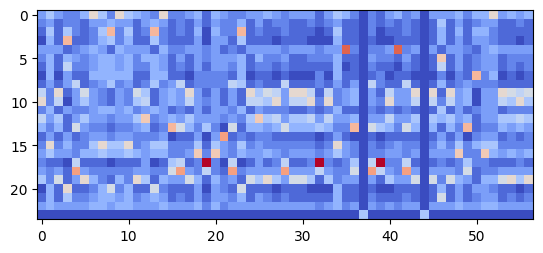

In [14]:
print(data['accession'][35000])
plt.imshow(data['sequence'][35000], cmap='coolwarm')

In [16]:
data['sequence'][1].shape

(24, 57)

In [18]:
data

,chembl_id,pChEMBL_value_Ki,Fingerprint,accession,sequence
0,CHEMBL10270,9.70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q64264,"[[0.25, 0.5625, 0.25, 0.1875, 0.3125, 0.25, 0...."
1,CHEMBL11388,7.26,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q64264,"[[0.25, 0.5625, 0.25, 0.1875, 0.3125, 0.25, 0...."
2,CHEMBL128329,4.50,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q64264,"[[0.25, 0.5625, 0.25, 0.1875, 0.3125, 0.25, 0...."
3,CHEMBL2021524,7.89,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q64264,"[[0.25, 0.5625, 0.25, 0.1875, 0.3125, 0.25, 0...."
4,CHEMBL2021538,8.00,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q64264,"[[0.25, 0.5625, 0.25, 0.1875, 0.3125, 0.25, 0...."
...,...,...,...,...,...
81212,CHEMBL4115424,6.64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q923Y9,"[[0.3125, 0.375, 0.3125, 0.1875, 0.25, 0.25, 0..."
81213,CHEMBL4115473,7.54,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q923Y9,"[[0.3125, 0.375, 0.3125, 0.1875, 0.25, 0.25, 0..."
81214,CHEMBL4115499,7.97,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q923Y9,"[[0.3125, 0.375, 0.3125, 0.1875, 0.25, 0.25, 0..."
81215,CHEMBL4115571,8.16,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Q923Y9,"[[0.3125, 0.375, 0.3125, 0.1875, 0.25, 0.25, 0..."


In [ ]:
def convert_data(data):
  data_array =

In [17]:
X1 = [seq for seq in data['sequence']]
X2 = [keras.utils.to_categorical(fp, num_classes=2) for fp in data['Fingerprint']]
y = [float(label) for label in data['pChEMBL_value_Ki']]

KeyboardInterrupt: ignored

In [ ]:
X1 = np.array(X1)
X2 = np.array(X2)
y = np.array(y)
print(np.shape(X1))
print(np.shape(X2))
print(np.shape(y))

(3407, 24, 57)
(3407, 2048, 2)
(3407,)


In [ ]:
# 이미지 데이터와 1024 비트 입력 데이터 분할
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.1, random_state=42)
X1_train, X1_val, X2_train, X2_val, y_train, y_val = train_test_split(X1_train, X2_train, y_train, test_size=0.2, random_state=42)

# 모델 훈련에 사용할 입력 데이터 구성
train_inputs = [X1_train, X2_train]
val_inputs = [X1_val, X2_val]
test_inputs = [X1_test, X2_test]

In [ ]:
train_inputs = [np.array(X1_train), np.array(X2_train)]
val_inputs = [np.array(X1_val), np.array(X2_val)]
test_inputs = [np.array(X1_test), np.array(X2_test)]

In [ ]:
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20),
            tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/5_HTR/aminergic_model_{epoch:02d}-{val_loss:.3f}.h5',save_best_only=True)]

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.02,
    decay_steps=100000,
    decay_rate=0.96)
optimizer_decay = keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
callback = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
    tf.keras.callbacks.ModelCheckpoint(
        filepath='/content/drive/MyDrive/5_HTR/aminergic_model_{epoch:02d}-{val_loss:.3f}.h5',
        save_best_only=True,
        monitor='val_loss',
        mode='min',
        save_weights_only=False,
        verbose=1,
        save_freq='epoch',
        save_best_val_loss_below=0.45
    )
]

In [ ]:
image_input_shape = (24, 57, 1)  # (높이, 너비, 채널)
bit_input_shape = (2048, 2)  # (비트 입력 크기,)

# 이미지 입력 경로
image_input = keras.Input(shape=image_input_shape)
x1_3x3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(image_input)
x1_5x5 = layers.Conv2D(32, (5, 5), padding='same', activation='relu')(image_input)
x1_7x7 = layers.Conv2D(32, (7, 7), padding='same', activation='relu')(image_input)

x1_3x3 = layers.MaxPooling2D((2, 2))(x1_3x3)
x1_5x5 = layers.MaxPooling2D((2, 2))(x1_5x5)
x1_7x7 = layers.MaxPooling2D((2, 2))(x1_7x7)

x1_3x3 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x1_3x3)
x1_5x5 = layers.Conv2D(64, (5, 5), padding='same', activation='relu')(x1_5x5)
x1_7x7 = layers.Conv2D(64, (7, 7), padding='same', activation='relu')(x1_7x7)

x1_3x3 = layers.MaxPooling2D((2, 2))(x1_3x3)
x1_5x5 = layers.MaxPooling2D((2, 2))(x1_5x5)
x1_7x7 = layers.MaxPooling2D((2, 2))(x1_7x7)

x1_3x3 = layers.Flatten()(x1_3x3)
x1_5x5 = layers.Flatten()(x1_5x5)
x1_7x7 = layers.Flatten()(x1_7x7)

# 경로 병합
x1 = layers.concatenate([x1_3x3, x1_5x5, x1_7x7])
x1 = layers.Dense(256, activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Dropout(0.2)(x1)
x1 = layers.Dense(128, activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)

# 비트 입력 경로
bit_input = keras.Input(shape=bit_input_shape)
x2 = layers.Flatten()(bit_input)

# 경로 병합
merged = layers.concatenate([x1, x2])
merged = layers.Dense(256, activation='relu')(merged)
merged = layers.BatchNormalization()(merged)
merged = layers.Dropout(0.2)(merged)
merged = layers.Dense(128, activation='relu')(merged)
merged = layers.BatchNormalization()(merged)

# 회귀 모델 출력 레이어 추가
outputs = layers.Dense(1)(merged)

# 모델 생성
model = keras.Model(inputs=[image_input, bit_input], outputs=outputs)

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 요약
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 57, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 24, 57, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 24, 57, 32)   832         ['input_1[0][0]']                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 24, 57, 32)   1600        ['input_1[0][0]']                
                                                                                              

In [ ]:
history = model.fit(train_inputs,y_train, validation_data = [val_inputs, y_val], epochs=200)

Epoch 1/200
77/77 [==============================] - 11s 22ms/step - loss: 46.0796 - val_loss: 4.6796
Epoch 2/200
77/77 [==============================] - 1s 13ms/step - loss: 20.0653 - val_loss: 6.3593
Epoch 3/200
77/77 [==============================] - 1s 13ms/step - loss: 2.9968 - val_loss: 10.6536
Epoch 4/200
77/77 [==============================] - 1s 12ms/step - loss: 0.8916 - val_loss: 358.5681
Epoch 5/200
77/77 [==============================] - 1s 12ms/step - loss: 0.7338 - val_loss: 4.8870
Epoch 6/200
77/77 [==============================] - 1s 11ms/step - loss: 0.5397 - val_loss: 14104.4043
Epoch 7/200
77/77 [==============================] - 1s 11ms/step - loss: 0.5379 - val_loss: 15425.6367
Epoch 8/200
77/77 [==============================] - 1s 11ms/step - loss: 0.4424 - val_loss: 223402.2656
Epoch 9/200
77/77 [==============================] - 1s 12ms/step - loss: 0.4301 - val_loss: 343514.6875
Epoch 10/200
77/77 [==============================] - 1s 12ms/step - loss: 0

KeyboardInterrupt: ignored

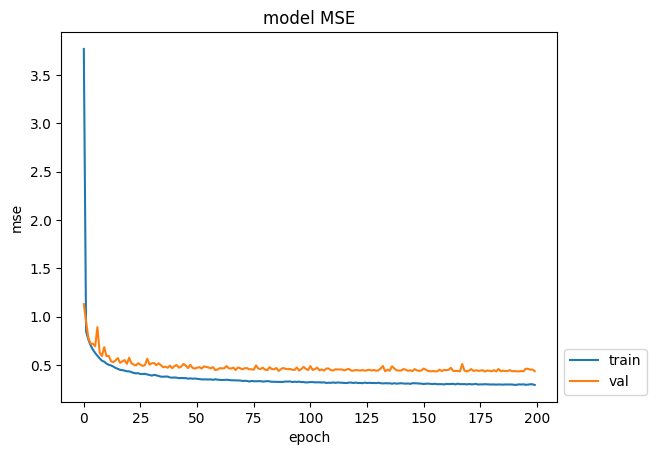

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model MSE')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left',bbox_to_anchor=(1, 0))
plt.show()


In [ ]:
loss_value = model.evaluate(test_inputs, y_test)

254/254 [==============================] - 1s 4ms/step - loss: 0.4438


In [ ]:
y_pred = model.predict(test_inputs)

254/254 [==============================] - 1s 3ms/step


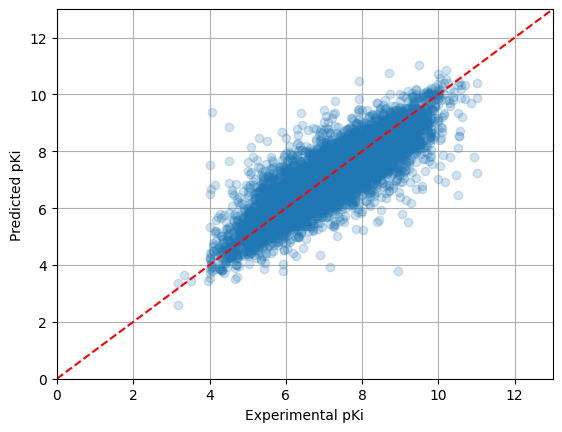

In [ ]:
plt.plot(y_test, y_pred, "o", alpha=0.2)
plt.plot(range(0, 14), range(0, 14), 'r--')
plt.xlabel("Experimental pKi")
plt.ylabel("Predicted pKi")
plt.xlim(0, 13)
plt.ylim(0, 13)
plt.grid()

In [ ]:
y_pred[0]

array([6.951989], dtype=float32)

In [ ]:
y_test[0]

6.7